In [2]:
import os
import tensorflow as tf

# Function to resize and preprocess dataset
def resize_images_and_masks(input_dir, output_dir, target_size=(128, 128)):
    images_input_path = os.path.join(input_dir, 'images')
    masks_input_path = os.path.join(input_dir, 'masks')

    images_output_path = os.path.join(output_dir, 'images')
    masks_output_path = os.path.join(output_dir, 'masks')

    os.makedirs(images_output_path, exist_ok=True)
    os.makedirs(masks_output_path, exist_ok=True)

    for image_file in os.listdir(images_input_path):
        if image_file.endswith(('.jpg', '.png')):
            input_path = os.path.join(images_input_path, image_file)
            output_path = os.path.join(images_output_path, image_file)

            image = tf.image.decode_image(tf.io.read_file(input_path))
            image = tf.image.resize(image, target_size)
            tf.keras.utils.save_img(output_path, image)

    for mask_file in os.listdir(masks_input_path):
        if mask_file.endswith(('.jpg', '.png')):
            input_path = os.path.join(masks_input_path, mask_file)
            output_path = os.path.join(masks_output_path, mask_file)

            mask = tf.image.decode_image(tf.io.read_file(input_path))
            mask = tf.image.resize(mask, target_size)
            tf.keras.utils.save_img(output_path, mask)

# Example usage
data_dir = "/kaggle/input/leaf-disease-segmentation-dataset/aug_data/aug_data"  # Replace with actual dataset path
output_dir = "/kaggle/working/"  # Path to save resized dataset
resize_images_and_masks(data_dir, output_dir)

print("Resizing completed and saved to:", output_dir)

Resizing completed and saved to: /kaggle/working/


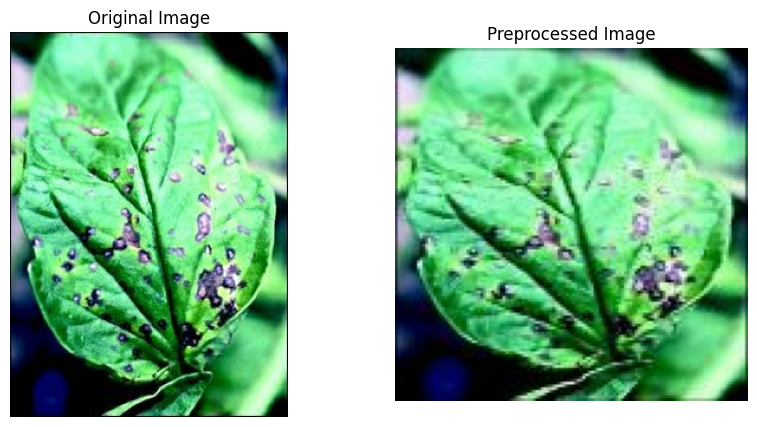

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Function to compare an original image and its preprocessed version
def compare_single_image(original_image_path, preprocessed_image_path):
    if not os.path.exists(original_image_path):
        print(f"Original image not found: {original_image_path}")
        return

    if not os.path.exists(preprocessed_image_path):
        print(f"Preprocessed image not found: {preprocessed_image_path}")
        return

    original_image = tf.image.decode_image(tf.io.read_file(original_image_path))
    preprocessed_image = tf.image.decode_image(tf.io.read_file(preprocessed_image_path))

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image.numpy().astype("uint8"))
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(preprocessed_image.numpy().astype("uint8"))
    plt.title("Preprocessed Image")
    plt.axis("off")

    plt.show()

# Example usage
original_image_path = "/kaggle/input/leaf-disease-segmentation-dataset/aug_data/aug_data/images/00000_1.jpg"  # Replace with actual original image path
preprocessed_image_path = "/kaggle/working/images/00000_1.jpg"  # Replace with actual preprocessed image path

compare_single_image(original_image_path, preprocessed_image_path)

Epoch 1/10


I0000 00:00:1736027677.554407      90 service.cc:145] XLA service 0x7f2d28002730 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1736027677.554455      90 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


      2/Unknown 12s 72ms/step - accuracy: 0.3771 - loss: 0.6731

I0000 00:00:1736027685.918249      90 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


    184/Unknown 39s 150ms/step - accuracy: 0.8012 - loss: 0.5103

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


184/184 ━━━━━━━━━━━━━━━━━━━━ 53s 225ms/step - accuracy: 0.8013 - loss: 0.5098 - val_accuracy: 0.8288 - val_loss: 0.4654
Epoch 2/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 34s 185ms/step - accuracy: 0.8216 - loss: 0.4130 - val_accuracy: 0.8288 - val_loss: 0.4632
Epoch 3/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 34s 184ms/step - accuracy: 0.8210 - loss: 0.3932 - val_accuracy: 0.8288 - val_loss: 0.4329
Epoch 4/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 34s 184ms/step - accuracy: 0.8216 - loss: 0.3855 - val_accuracy: 0.8288 - val_loss: 0.4365
Epoch 5/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 34s 184ms/step - accuracy: 0.8216 - loss: 0.3952 - val_accuracy: 0.8293 - val_loss: 0.4142
Epoch 6/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 34s 184ms/step - accuracy: 0.8319 - loss: 0.3792 - val_accuracy: 0.8395 - val_loss: 0.3776
Epoch 7/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 34s 183ms/step - accuracy: 0.8417 - loss: 0.3640 - val_accuracy: 0.8431 - val_loss: 0.3977
Epoch 8/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 34s 186ms/step - accuracy: 0.8449 - loss: 0.3551 - val

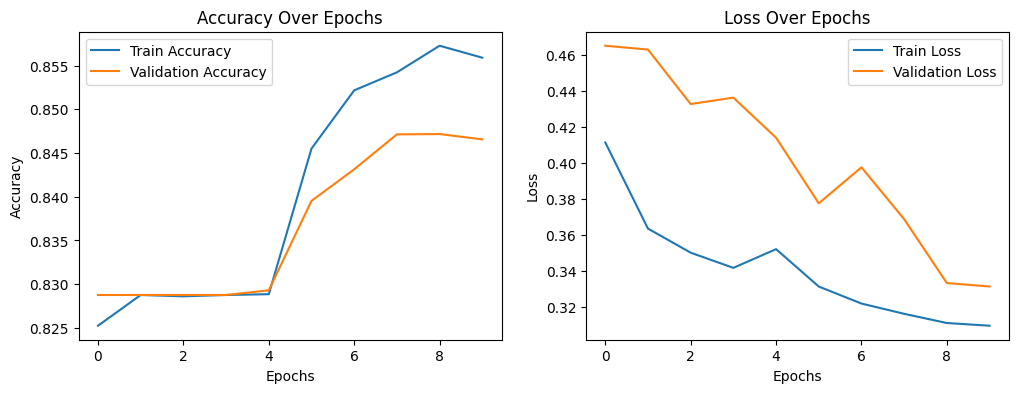

Model training and evaluation completed.


In [4]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

# Function to build a U-Net model
def build_unet_model(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    # Bottleneck
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)

    # Decoder
    u1 = layers.UpSampling2D((2, 2))(c3)
    u1 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u1)
    u1 = layers.Concatenate()([u1, c2])
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u1)
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c4)

    u2 = layers.UpSampling2D((2, 2))(c4)
    u2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u2)
    u2 = layers.Concatenate()([u2, c1])
    c5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u2)
    c5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c5)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c5)

    model = models.Model(inputs, outputs)
    return model

# Function to load the dataset
def load_segmentation_dataset(images_dir, masks_dir, batch_size=16):
    def load_data():
        image_files = sorted([os.path.join(images_dir, f) for f in os.listdir(images_dir) if f.endswith('.jpg') or f.endswith('.png')])
        mask_files = sorted([os.path.join(masks_dir, f) for f in os.listdir(masks_dir) if f.endswith('.jpg') or f.endswith('.png')])

        if not image_files or not mask_files:
            raise FileNotFoundError("Image or mask files not found in the provided directories.")

        for image_file, mask_file in zip(image_files, mask_files):
            image = tf.image.decode_image(tf.io.read_file(image_file))
            image = tf.image.resize(image, (128, 128)) / 255.0

            mask = tf.image.decode_image(tf.io.read_file(mask_file))
            mask = tf.image.resize(mask, (128, 128)) / 255.0

            yield image, mask

    dataset = tf.data.Dataset.from_generator(
        load_data,
        output_signature=(
            tf.TensorSpec(shape=(128, 128, 3), dtype=tf.float32),
            tf.TensorSpec(shape=(128, 128, 1), dtype=tf.float32),
        )
    )
    return dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Function to evaluate the model
def evaluate_model(model, dataset):
    y_true = []
    y_pred = []

    for images, masks in dataset:
        predictions = model.predict(images)
        predictions = (predictions > 0.5).astype(int)

        y_true.extend(masks.numpy().flatten())
        y_pred.extend(predictions.flatten())

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Classification Report
    print(classification_report(y_true, y_pred, target_names=['Background', 'Foreground']))

# Function to plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Paths to preprocessed images and masks
images_dir = "/kaggle/working/images"
masks_dir = "/kaggle/working/masks"

# Load datasets
train_dataset = load_segmentation_dataset(images_dir, masks_dir)

# Build and compile the model
input_shape = (128, 128, 3)
model = build_unet_model(input_shape)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, validation_data=train_dataset, epochs=10)

# Evaluate the model
import os
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, recall_score, f1_score, roc_curve, auc, precision_score
import numpy as np
import seaborn as sns

# Function to evaluate the model
def evaluate_model(model, dataset):
    y_true = []
    y_pred = []

    for images, masks in dataset:
        predictions = model.predict(images)
        predictions = predictions.flatten()

        y_true.extend(masks.numpy().flatten())  # Keep masks as continuous for ROC
        y_pred.extend(predictions)

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Threshold for binary metrics
    binary_y_true = (y_true > 0.5).astype(int)
    binary_y_pred = (y_pred > 0.5).astype(int)

    # Confusion Matrix
    cm = confusion_matrix(binary_y_true, binary_y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Classification Metrics
    print("Classification Report:")
    print(classification_report(binary_y_true, binary_y_pred, target_names=['Background', 'Foreground']))

    recall = recall_score(binary_y_true, binary_y_pred)
    f1 = f1_score(binary_y_true, binary_y_pred)
    precision = precision_score(binary_y_true, binary_y_pred)

    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Example usage (replace dataset with actual validation or test dataset)
# evaluate_model(trained_model, validation_dataset)
    # Classification Report
    print(classification_report(y_true, y_pred, target_names=['Background', 'Foreground']))

# Plot training history
plot_training_history(history)

print("Model training and evaluation completed.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━

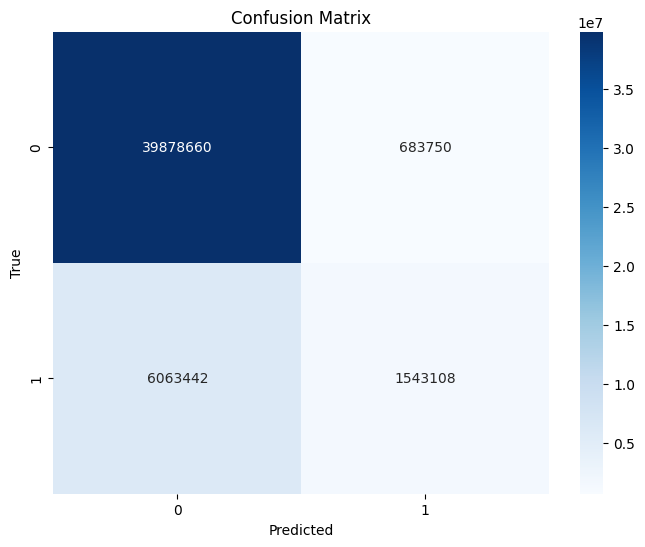

In [5]:
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def evaluate_and_plot_metrics(model, test_dataset):
    y_true = []
    y_pred = []

    # Predict on the test dataset
    for images, masks in test_dataset:
        predictions = model.predict(images)
        predictions = predictions.flatten()
        y_true.extend(masks.numpy().flatten())
        y_pred.extend(predictions)

    # Convert predictions and true values to binary format
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    binary_y_true = (y_true > 0.5).astype(int)
    binary_y_pred = (y_pred > 0.5).astype(int)

    # Confusion Matrix
    cm = confusion_matrix(binary_y_true, binary_y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    
 

# Example usage
# Replace `test_dataset` with your actual test dataset
evaluate_and_plot_metrics(model, train_dataset)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step


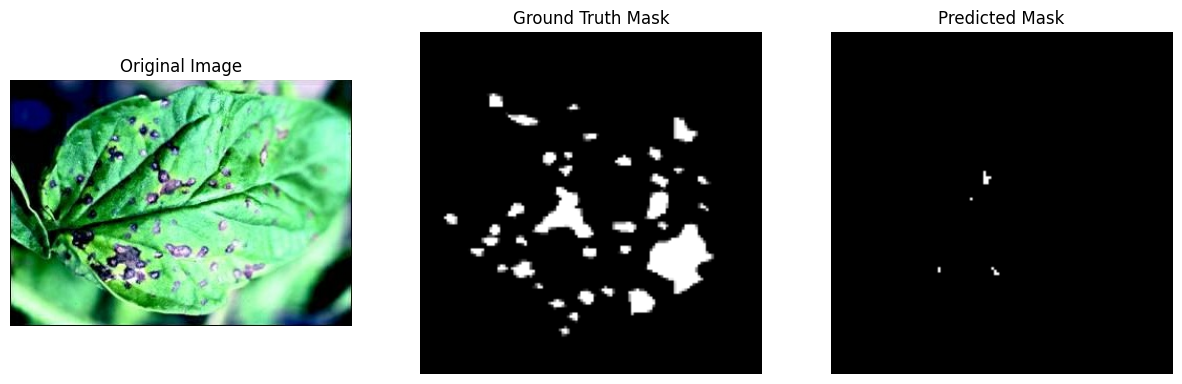

In [6]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Function to load and preprocess a single test image
def load_and_preprocess_image(image_path, target_size=(128, 128)):
    image = tf.image.decode_image(tf.io.read_file(image_path))
    image = tf.image.resize(image, target_size) / 255.0
    return tf.expand_dims(image, axis=0)  # Add batch dimension

# Function to test the model
def test_model(model, test_image_path, ground_truth_path=None, target_size=(128, 128)):
    # Load and preprocess the test image
    test_image = load_and_preprocess_image(test_image_path, target_size)

    # Make predictions
    prediction = model.predict(test_image)
    prediction_mask = (prediction[0] > 0.5).astype(np.uint8)  # Convert to binary mask

    # Plot the results
    plt.figure(figsize=(15, 5))

    # Original Image
    plt.subplot(1, 3, 1)
    original_image = tf.image.decode_image(tf.io.read_file(test_image_path))
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis("off")

    # Ground Truth Mask (if available)
    if ground_truth_path:
        ground_truth = tf.image.decode_image(tf.io.read_file(ground_truth_path), channels=1)
        ground_truth = tf.image.resize(ground_truth, target_size) / 255.0
        plt.subplot(1, 3, 2)
        plt.imshow(tf.squeeze(ground_truth), cmap="gray")
        plt.title("Ground Truth Mask")
        plt.axis("off")

    # Predicted Mask
    plt.subplot(1, 3, 3)
    plt.imshow(prediction_mask, cmap="gray")
    plt.title("Predicted Mask")
    plt.axis("off")

    plt.show()

# Example usage
test_image_path = "/kaggle/input/leaf-disease-segmentation-dataset/aug_data/aug_data/images/00000_3.jpg"  # Replace with your test image path
ground_truth_path = "/kaggle/input/leaf-disease-segmentation-dataset/aug_data/aug_data/masks/00000_1.png"  # Replace with your ground truth mask path (optional)

# Call the test function
test_model(model, test_image_path, ground_truth_path)
